# Simple Topic Modelling with pseudo tfidf vectors

In [1]:
import numpy as np
topic = {}

In [2]:
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(),np.random.rand(6))))

In [3]:
tfidf

{'cat': 0.1873004591864753,
 'dog': 0.4988266967285051,
 'apple': 0.8054188593463358,
 'lion': 0.6453099679313762,
 'NYC': 0.15824575574829447,
 'love': 0.9542233390503292}

In [4]:
topic['petness'] = (.3 * tfidf['cat'] +
                    .3 * tfidf['dog'] + 
                    0 * tfidf['apple'] +
                    0 * tfidf['lion'] -
                    .2 * tfidf['NYC'] +
                    .2 * tfidf['love'])

In [5]:
topic

{'petness': 0.36503366343490107}

In [6]:
topic['animalness'] = (.1 * tfidf['cat'] +
                       .1 * tfidf['dog'] -
                       .1 * tfidf['apple'] +
                       .5 * tfidf['lion'] +
                       .1 * tfidf['NYC'] -
                       .1 * tfidf['love'])
topic

{'petness': 0.36503366343490107, 'animalness': 0.23112805529234914}

In [7]:
topic['cityness'] = (0 * tfidf['cat'] -
                     .1 * tfidf['dog'] +
                     .2 * tfidf['apple'] -
                     .1 * tfidf['lion'] +
                     .5 * tfidf['NYC'] +
                     .1 * tfidf['love'])

In [8]:
topic

{'petness': 0.36503366343490107,
 'animalness': 0.23112805529234914,
 'cityness': 0.22121531718245918}

In [9]:
tfidf = dict(list(zip('cow exam study books plants space'.split(),np.random.rand(6))))
tfidf

{'cow': 0.23497820633242317,
 'exam': 0.14242446880834236,
 'study': 0.41423791511144226,
 'books': 0.5592865506610379,
 'plants': 0.9745347166139849,
 'space': 0.7089535090868263}

In [10]:
topic_my = {}

In [11]:
topic_my['university'] = (0*tfidf['cow'] +
                         0.4* tfidf['exam']+
                          0.2*tfidf['study']+
                          0.2*tfidf['books']+
                          0.1*tfidf['plants']+
                          0.1*tfidf['space']
                         )

In [12]:
topic_my['garden'] = (0.1* tfidf['cow']-
                     0.2*tfidf['exam']+
                     0.1*tfidf['study']+
                     0.1*tfidf['books']+
                     0.5*tfidf['plants']+
                     0.2*tfidf['space'])

In [13]:
topic_my['satellite'] = (0.0* tfidf['cow']+
                     0.1*tfidf['exam']+
                     0.1*tfidf['study']+
                     0.1*tfidf['books']-
                     0.2*tfidf['plants']+
                     0.5*tfidf['space'])

In [14]:
topic_my

{'university': 0.42002350324791415,
 'garden': 0.7214234335731796,
 'satellite': 0.2711647046786984}

# Q. What is the relation between the three: topics, (0.1,0.2..) and the tfidf vectors

## Input is tfidf vectors
# Output is topic vectors
## What are these numbers called (0.1,0.2,0.5......)

### They are called . . . . . .....................................

# Importance parameters or values or engineering .. . . .

# ..
# ..
# ..
# ..
# ..
# ..

# Weights

# TV = W*tfidf

# 3 by 1 = 3 by 6  6 by 1


In [15]:
len(topic_my)

3

In [16]:
len(tfidf)

6

# My weight matrix is 3 by 6

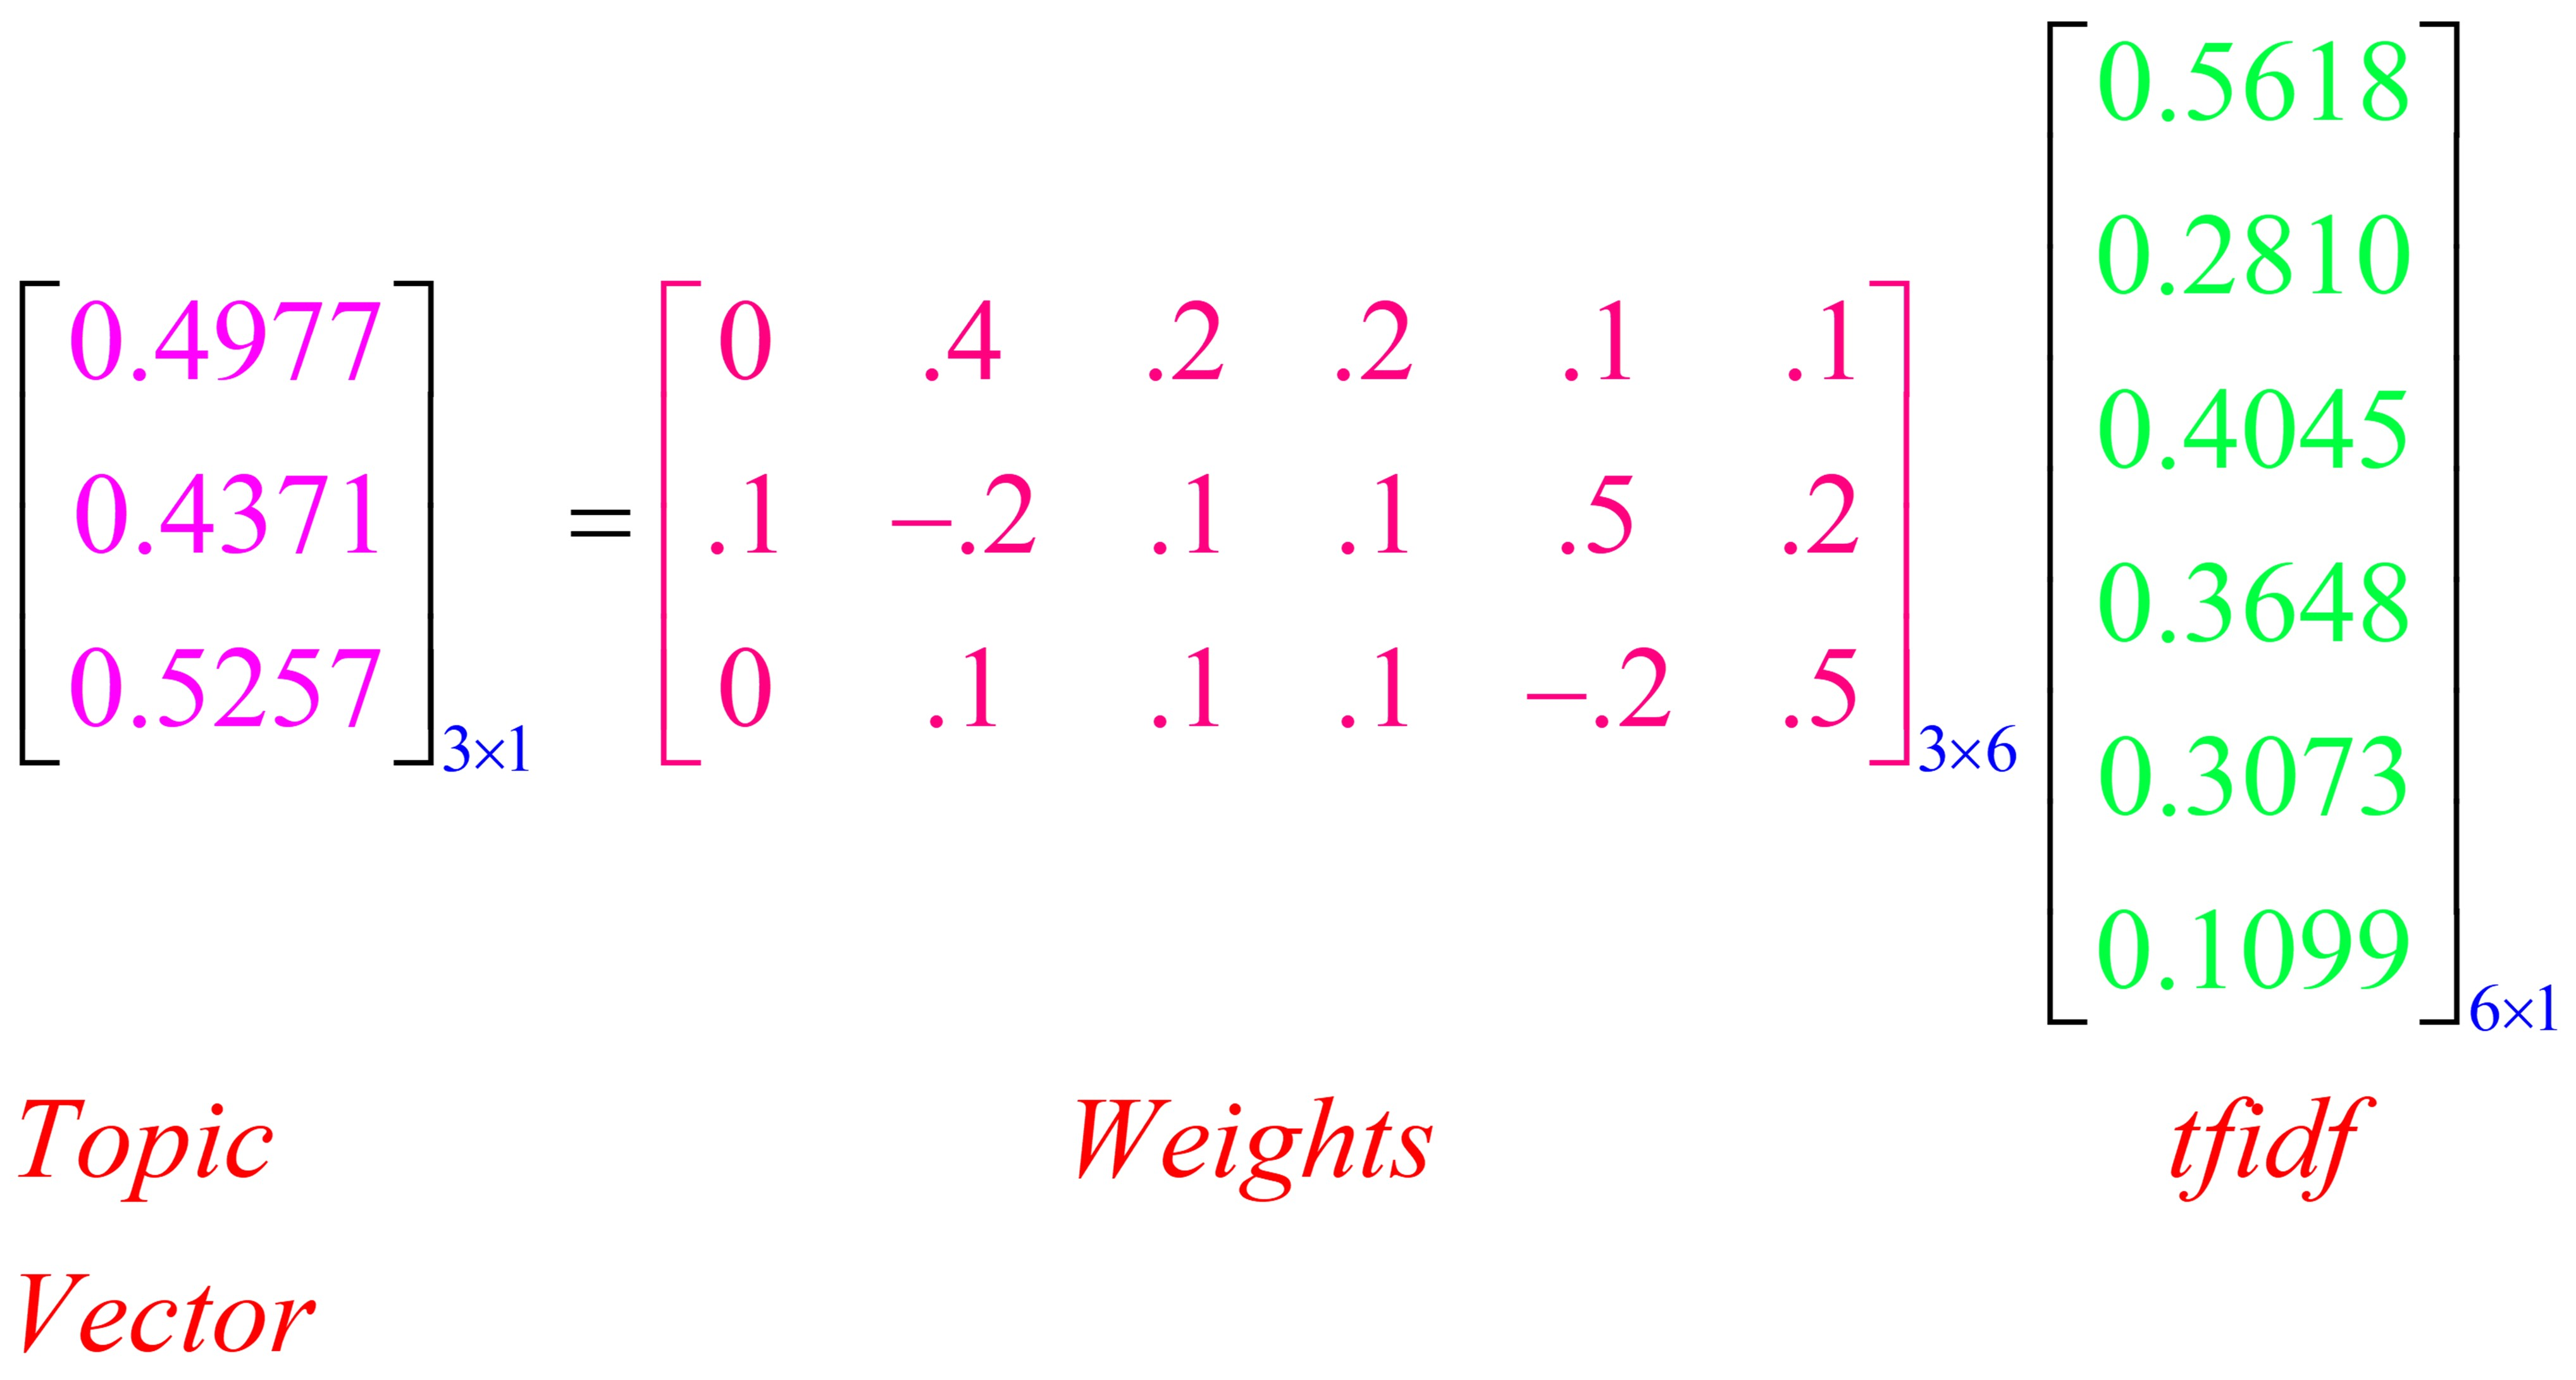

# Q1. How can we decide on weights?
## OR 
# Q2. Who will decide on what should be the weight for a topic?

# ALM_1: select 7 words and create a random topic vector for 4 topics. Use hand crafted weights as required by each topic. Express how you arrived at the marked weights for a particular word to create a topic vector. How you might chage them based on your instructurs opinion. What could you use as a objctive measure of these weights? If you use a negative sign for the weight, what does this mean in relation to a topic vector.

# What happens if the weight matrix is transposed.

In [17]:
tfidf.keys()

dict_keys(['cow', 'exam', 'study', 'books', 'plants', 'space'])

In [18]:
tfidf.values()

dict_values([0.23497820633242317, 0.14242446880834236, 0.41423791511144226, 0.5592865506610379, 0.9745347166139849, 0.7089535090868263])

In [19]:
tfidf_lst = list(tfidf.values())
tfidf_lst

[0.23497820633242317,
 0.14242446880834236,
 0.41423791511144226,
 0.5592865506610379,
 0.9745347166139849,
 0.7089535090868263]

In [20]:
weights =np.array([[0,.4,0.2,0.2,.1,.1],
          [.1,-.2,.1,.1,.5,.2],
          [0,.1,.1,.1,-.2,.5]])
[len(a) for a in weights]

[6, 6, 6]

In [21]:
tv = np.matmul(weights, tfidf_lst)
tv

array([0.4200235 , 0.72142343, 0.2711647 ])

In [22]:
topic_my.keys()

dict_keys(['university', 'garden', 'satellite'])

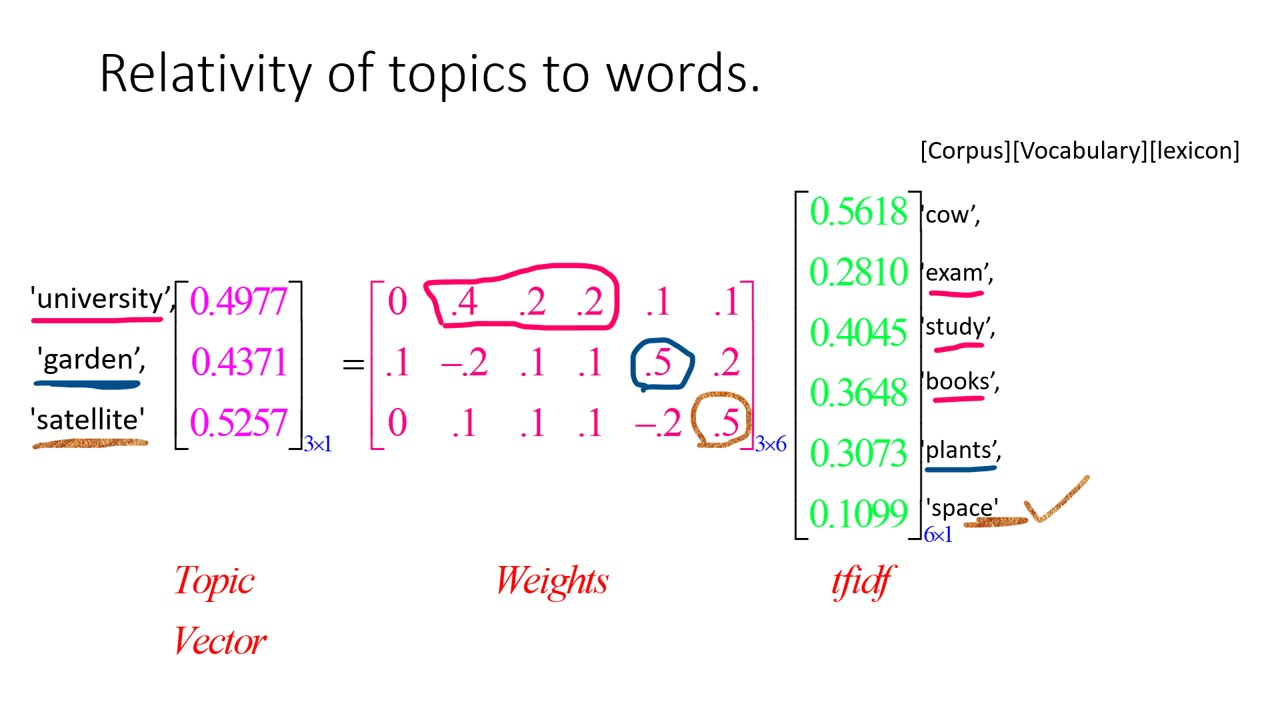

# To Model Meaning of words into NUMBERS or TOPIC VECTORS: What has been done.?

# Transpose the weigth matrix. 

In [23]:
X1 = np.array(weights.T)

# Topic vectors for each of these six words in our vocabulary or corpus

# These 6 Topic Vectors represents the meaning of each of your 6 words as 3D Vectors

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
X, Y, Z,U,V,W = zip(X1)
X1

array([[ 0. ,  0.1,  0. ],
       [ 0.4, -0.2,  0.1],
       [ 0.2,  0.1,  0.1],
       [ 0.2,  0.1,  0.1],
       [ 0.1,  0.5, -0.2],
       [ 0.1,  0.2,  0.5]])

In [26]:
U

(array([0.2, 0.1, 0.1]),)

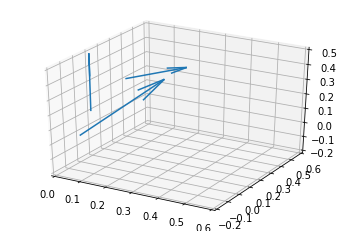

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([0, 0.6])
ax.set_ylim([-0.2, 0.6])
ax.set_zlim([-0.2, 0.5])
plt.show()

In [28]:
Y_pad = np.pad(X1,((0,0),(3,0)))

In [29]:
Y_pad

array([[ 0. ,  0. ,  0. ,  0. ,  0.1,  0. ],
       [ 0. ,  0. ,  0. ,  0.4, -0.2,  0.1],
       [ 0. ,  0. ,  0. ,  0.2,  0.1,  0.1],
       [ 0. ,  0. ,  0. ,  0.2,  0.1,  0.1],
       [ 0. ,  0. ,  0. ,  0.1,  0.5, -0.2],
       [ 0. ,  0. ,  0. ,  0.1,  0.2,  0.5]])

In [30]:
X, Y, Z,U,V,W = zip(*Y_pad)
U

(0.0, 0.4, 0.2, 0.2, 0.1, 0.1)

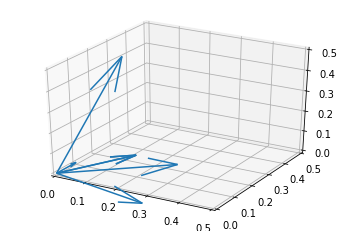

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([0, 0.5])
ax.set_ylim([0, 0.5])
ax.set_zlim([0, 0.5])
plt.show()